# A Guide to Non-Minimum Phase Systems

This notebook has the codes used to generate the step response in the article https://www.ealizadeh.com/blog/2020/10/non-minimum-phase-systems/.  

Website: https://ealizadeh.com
Medium profile: https://medium.com/@ealizadeh 

Copyright © 2020 Esmaeil Alizadeh

In [ ]:
import pandas as pd
import numpy as np
from numpy import linspace

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="svg", bbox_inches="tight")

from control.matlab import *
import control as ct

In [2]:
amplifier = 1 # 20
offset = 0 # 25

# num = [-1, 2]
# den = [1, 3, 1]
sys1 = tf(np.array([1, 2])*amplifier, np.array([1, 3, 2])) + offset
sys2 = tf(np.array([-1, 2])*amplifier, np.array([1, 3, 2])) + offset

delay = pade(1, 1)
delay_sys = tf(delay[0], delay[1])

In [3]:
sys1


    s + 2
-------------
s^2 + 3 s + 2

In [4]:
sys2


    -s + 2
-------------
s^2 + 3 s + 2

In [5]:
print(f"System 1 Zero: {zero(sys1)}")
print(f"System 1 Poles: {pole(sys1).round(2)}")
print(f"System 1 DC Gain: {dcgain(sys1).round(2)}")
print("\n")
print(f"System 2 Zero: {zero(sys2)}")
print(f"System 2 Poles: {pole(sys2).round(2)}")
print(f"System 2 DC Gain: {dcgain(sys2).round(2)}")

System 1 Zero: [-2.]
System 1 Poles: [-2. -1.]
System 1 DC Gain: 1.0


System 2 Zero: [2.]
System 2 Poles: [-2. -1.]
System 2 DC Gain: 1.0


In [6]:
step_resp1, time = step(sys1, linspace(0, 8, 500))
step_resp2, _ = step(sys2, linspace(0, 8, 500))


step_resp3, _ = step(delay_sys * sys2, linspace(0, 8, 500))

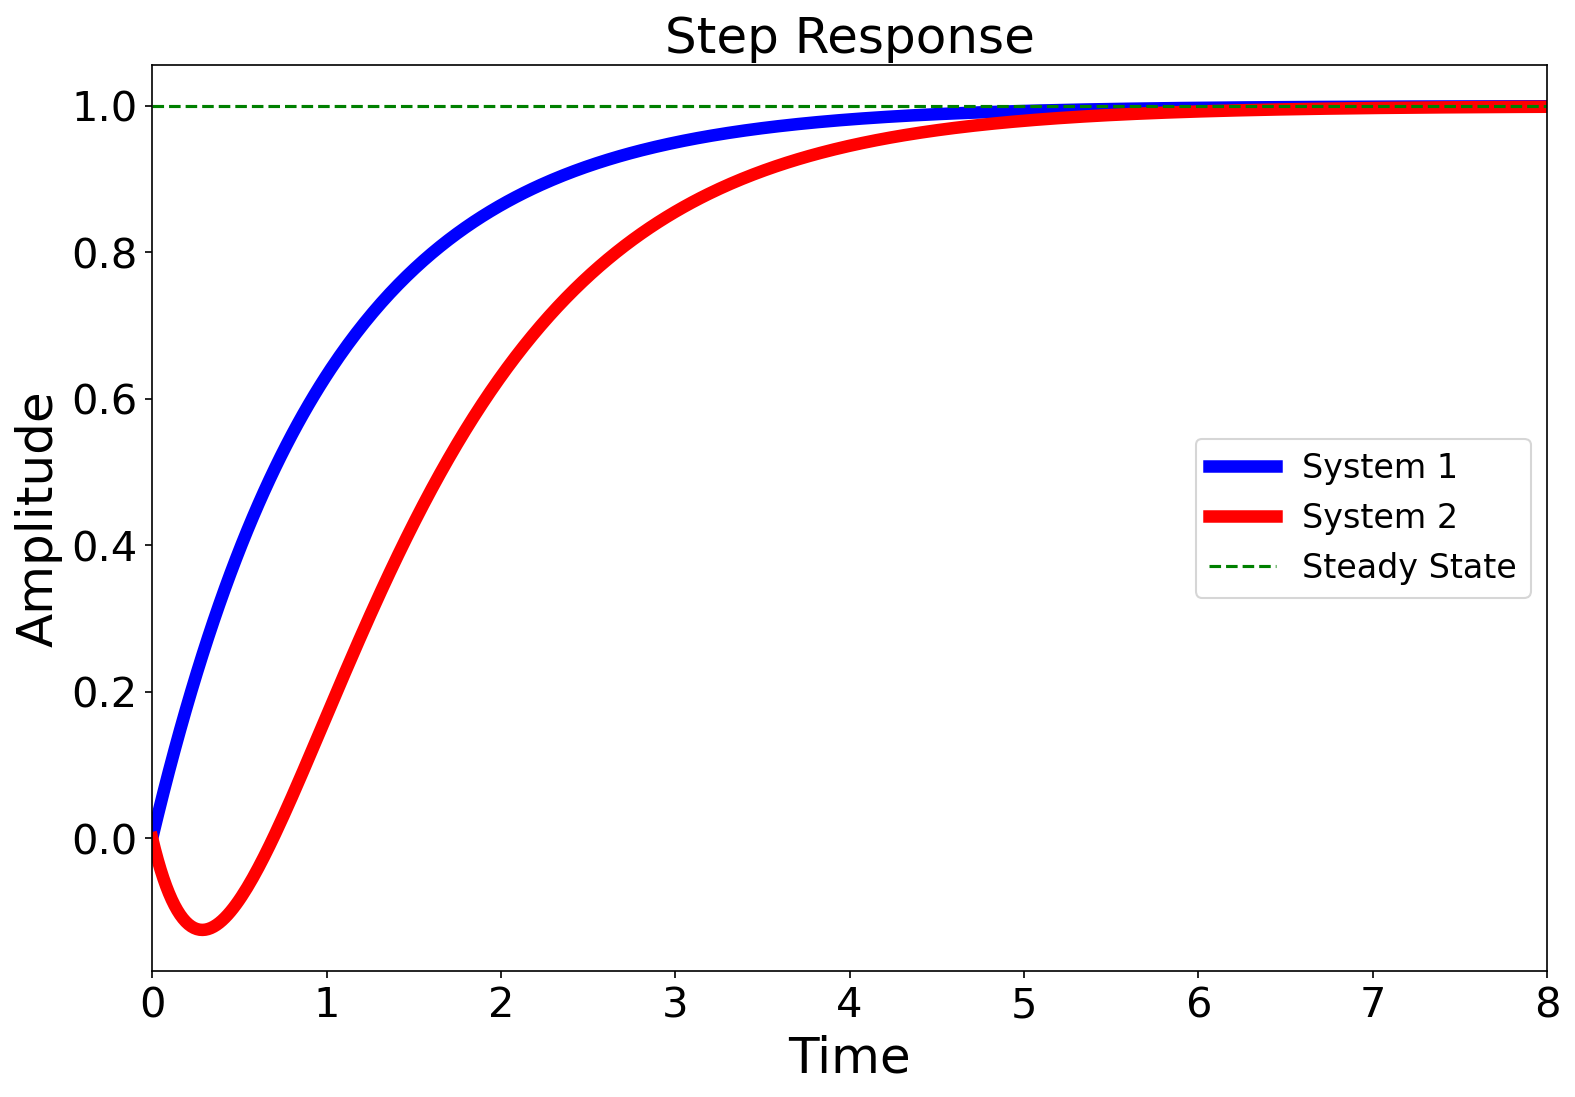

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(time, step_resp1, '-b', linewidth=6, label="System 1")
ax.plot(time, step_resp2, '-r', linewidth=6, label="System 2")
# ax.plot(time, step_resp3, '-g', linewidth=4)
ax.axhline(y=dcgain(sys1), linestyle= "--", color='g', label="Steady State")

# Plot config
ax.set_title("Step Response", fontsize=24)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Amplitude", fontsize=24)
ax.set_xlim([0, 8])
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)

fig.savefig("step.svg", **savefig_options)